# Procedural program to get and analyze RSS-Newsfeeds

## Libraries and settings

In [1]:
# Libraries
import os
import requests
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from requests_html import HTMLSession

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/sivanujanselvarajah/Documents/zhaw/4.Semester/Scientific programming/scientific_programming/Week_07/challenge


## Functions to get the content of RSS-Feeds

In [3]:
def get_source(url):
    """
    Provides source code of the website of the specified URL.

    :param url: URL of the page to scrape. Type = str
    :return: Response from serrver request. Type = requests_html.HTMLResponse
    """
    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_single_feed(url):
    """
    Derives the content of a single RSS-Feed for the provided URL.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    response = get_source(url)
    rows = []

    with response as r:
        items = r.html.find("item", first=False)
        for item in items:
            title = item.find('title', first=True).text
            pubDate = item.find('pubDate', first=True).text
            guid = item.find('guid', first=True).text
            description_element = item.find('description', first=True)
            
            # Check if 'description' element exists before accessing 'text'
            description = description_element.text if description_element is not None else ""
            
            row = {'title': title, 'pubDate': pubDate, 'guid': guid, 'description': description}
            rows.append(row)

    df = pd.DataFrame(rows)
    return df

def get_multiple_feeds(url_list):
    """
    Derives the content on RSS-Feed for the provided list of URLs.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    
    df = pd.DataFrame(columns = ['title', 'pubDate', 'guid', 'description'])

    for url in url_list:

        df_iter = get_single_feed(url)
        df = pd.concat([df, df_iter], ignore_index=True)

    return df


## Getting infos from single RSS-Feed

In [4]:
# Call functions for single feed
df_feed = get_single_feed('https://www.nzz.ch/international.rss')
df_feed.head(10)

,title,pubDate,guid,description
0,Der übergrosse Modi gewinnt die Wahlen in Indi...,"Tue, 04 Jun 2024 13:58:20 GMT",ld.1833449,Die Hindu-Nationalisten erzielen erneut eine M...
1,Wer ist Nigel Farage – das zurückkehrende Schr...,"Tue, 04 Jun 2024 12:55:22 GMT",ld.1833504,Der polarisierende Brexit-Vorkämpfer will es n...
2,Nigel Farage plant seinen nächsten Coup – und ...,"Tue, 04 Jun 2024 09:33:13 GMT",ld.1833428,Der Brexit-Vorkämpfer steigt als Spitzenkandid...
3,Der Hunter-Biden-Prozess dürfte auch einen Sch...,"Tue, 04 Jun 2024 03:30:00 GMT",ld.1833351,Der Sohn des amerikanischen Präsidenten steht ...
4,Brigitte Bierlein führte das Land aus der Ibiz...,"Mon, 03 Jun 2024 17:35:35 GMT",ld.1833389,Vor fünf Jahren betrat Österreich nach dem Ibi...
5,Die deutsche Regierung lobt sich selbst für ih...,"Tue, 04 Jun 2024 09:28:09 GMT",ld.1833297,Die Ampelkoalition will durch weitere Abkommen...
6,KOMMENTAR - Mexiko wählt eine Frau als Präside...,"Mon, 03 Jun 2024 15:08:16 GMT",ld.1833147,Die Regierungskoalition erringt die Präsidents...
7,Was Joe Biden im Waffenstillstandsplan für den...,"Mon, 03 Jun 2024 14:37:15 GMT",ld.1833314,Mit einer Zustimmung zu der Übereinkunft würde...
8,Als offizielle Landessprache Zyperns könnte Tü...,"Tue, 04 Jun 2024 03:30:00 GMT",ld.1833285,Viele ethnische Türken auf der geteilten Insel...
9,Erstmals seit Monaten setzt die Ukraine Moskau...,"Tue, 04 Jun 2024 03:30:00 GMT",ld.1833287,Seit die USA wieder Munition liefern und Angri...


## Getting infos from multiple RSS-Feeds

In [5]:
# List with RSS-Feeds (germ. and engl.)

url_list = ['https://www.spiegel.de/schlagzeilen/index.rss',
            'https://www.nzz.ch/international.rss',
            'https://rss.nytimes.com/services/xml/rss/nyt/Europe.xml',
            'https://rss.nytimes.com/services/xml/rss/nyt/World.xml']

# Function call
df_multi_feeds = get_multiple_feeds(url_list)
df_multi_feeds.head(10)

,title,pubDate,guid,description
0,FTI-Insolvenz: Konkurrenten wollen mit zusätzl...,"Tue, 4 Jun 2024 16:02:00 +0200",https://www.spiegel.de/wirtschaft/unternehmen/...,Die Pleite des Reiseveranstalters FTI trifft a...
1,Russland: Deutscher Geschäftsmann flüchtete au...,"Tue, 4 Jun 2024 15:54:00 +0200",https://www.spiegel.de/ausland/russland-deutsc...,Nervenkrieg in der Moskauer Botschaft: Ein deu...
2,FC Bayern München: Karl-Heinz Rummenigge forde...,"Tue, 4 Jun 2024 15:46:00 +0200",https://www.spiegel.de/sport/fussball/fc-bayer...,Kaum ist Vincent Kompany neuer Trainer beim FC...
3,Colorado: Halskette schützt Mann vor potenziel...,"Tue, 4 Jun 2024 15:40:00 +0200",https://www.spiegel.de/panorama/justiz/colorad...,"In der Nähe von Denver kommt es zum Streit, da..."
4,Europawahl: So prägt die EU den Alltag der Bürger,"Tue, 4 Jun 2024 15:34:00 +0200",https://www.spiegel.de/politik/deutschland/eur...,"Die Europäische Union gilt als bürokratisch, b..."
5,Hochwasser in Süddeutschland: Passau ruft Kata...,"Tue, 4 Jun 2024 15:22:00 +0200",https://www.spiegel.de/panorama/hochwasser-in-...,In Passau erwartet man einen Pegelstand der Do...
6,Fortress Europe: Migrants Abandoned on the Edg...,"Tue, 4 Jun 2024 15:06:00 +0200",https://www.spiegel.de/international/world/for...,"In Mauritania, Morocco and Tunisia, migrants a..."
7,London: Drei neugeborene Geschwister innerhalb...,"Tue, 4 Jun 2024 14:56:00 +0200",https://www.spiegel.de/panorama/justiz/london-...,"Im Herbst 2017, in den Wintern von 2019 und 20..."
8,E-Mobilität: Bau von ACC-Batteriezellfabrik in...,"Tue, 4 Jun 2024 14:42:00 +0200",https://www.spiegel.de/wirtschaft/unternehmen/...,In Rheinland-Pfalz soll eine Gigafactory für B...
9,Borussia Dortmund: Marco Reus verabschiedet si...,"Tue, 4 Jun 2024 14:38:00 +0200",https://www.spiegel.de/sport/fussball/borussia...,Marco Reus hat bewegende Wochen hinter sich. N...


## Finding the k most frequent words per RSS-Feed title

In [7]:
for item in df_multi_feeds['title']:

    from collections import Counter
    
    split_txt = item.split()
    Counter = Counter(split_txt)
    most_occur = Counter.most_common(5)
    print(most_occur)

[('Grundsteuer:', 1), ('FDP-Chef', 1), ('Christian', 1), ('Lindner', 1), ('lehnt', 1)]
[('Italien:', 1), ('Mehrere', 1), ('Menschen', 1), ('bei', 1), ('Explosion', 1)]
[('Harald', 1), ('Burkart:', 1), ('AfD', 1), ('widerspricht', 1), ('sich', 1)]
[('Sonnenfinsternis:', 1), ('105-Jähriger', 1), ('beobachtet', 1), ('seine', 1), ('13.', 1)]
[('News', 1), ('des', 1), ('Tages:', 1), ('Urteil', 1), ('zum', 1)]
[('ist', 2), ('Galeria', 1), ('Karstadt', 1), ('Kaufhof:', 1), ('Ein', 1)]
[('Sylvester', 1), ('Stallone', 1), ('soll', 1), ('Komparsen', 1), ('am', 1)]
[('Smart', 1), ('plant', 1), ('neuen', 1), ('Zweisitzer', 1), ('mit', 1)]
[('zu', 2), ('Studie', 1), ('Aggressionsbewältigung:', 1), ('In', 1), ('zwei', 1)]
[('Schweiz:', 1), ('Schweizerische', 1), ('Volkspartei', 1), ('(EVP)', 1), ('fordert', 1)]
[('„Bridgerton“:', 1), ('Nicola', 1), ('Coughlan', 1), ('bestand', 1), ('auf', 1)]
[('Armenien', 1), ('und', 1), ('Aserbaidschan:', 1), ('Warum', 1), ('die', 1)]
[('Hubertus', 1), ('Heil:', 1

## Create a wordcloud with the most frequent words in RSS-Feed titles

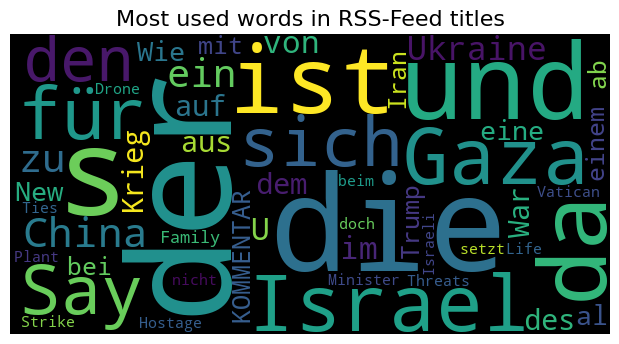

In [8]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    """
    Creates a plot of a word cloud based on the given data

    :param data: input data. Type = str
    :param title: plot title. Type

    """
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(df_multi_feeds['title'], 
                    title="Most used words in RSS-Feed titles")

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [9]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.3.0
Datetime: 2024-04-09 19:35:29
Python Version: 3.10.13
-----------------------------------
